In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import datetime
import folium

%matplotlib inline

## Week 1

In [2]:
police_calls = pd.read_csv('../data/police_calls_2018.csv')
police_calls.head(5)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


In [3]:
police_calls.tail(3)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
718018,PD201800855208,08/29/2018 09:11:36 AM,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,3T73,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD
718019,PD201800783912,08/08/2018 10:15:20 AM,0,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,0.0,HIGHWAY 70&CHEATHAM CO LINE,NaN,W,25,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM
718020,PD201800800491,08/13/2018 11:51:29 AM,20180693242,A,96,Business Check,4,ASSISTED CITIZEN,0.0,HIGHWAY 70&CHEATHAM CO LINE,5252,W,23,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM


In [4]:
police_calls.shape

(718021, 18)

In [5]:
police_calls = police_calls.drop(columns = ['Event Number', 'Complaint Number', 'Block', 'Street Name', 'geometry'])

In [6]:
police_calls.head()

,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Zone,Latitude,Longitude,zipcode,PO
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


In [7]:
police_calls.columns = ['call_time', 'shift', 'tencode', 'tencode_desc', 'disposition', 'disposition_desc', 'unit_dispatched', 'sector', 'zone', 'lat', 'lng', 'zipcode', 'po']

In [8]:
police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,02/16/2018 05:58:00 PM,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,02/16/2018 04:19:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


In [9]:
police_calls.disposition_desc.nunique()
## nunique ignores null values. Use instead of unique to count instead of getting an array. 

15

In [10]:
police_calls_2 = police_calls.loc[~police_calls.disposition_desc.isin(['DISREGARD / SIGNAL 9', 'NO RESPONSE'])]

In [11]:
police_calls_2 = police_calls_2[police_calls_2['disposition_desc'].notna()]
## Could have also done notnull() Could have chained these steps with a '&'.

In [12]:
police_calls_2.shape

(624841, 13)

In [13]:
tencode_count = police_calls_2['tencode_desc'].value_counts()

In [14]:
tencode_counts = pd.DataFrame(data=tencode_count)

In [15]:
tencode_counts = tencode_counts.reset_index()

In [16]:
tencode_counts.columns = ['tencode', 'tencode_counts']

In [17]:
tencode_counts.head()

,tencode,tencode_counts
0,Business Check,154763
1,Traffic Violation,141283
2,Want Officer for Investigation / Assistance,100465
3,Administrative/Special Assignment,34094
4,Community Policing Activity,34001


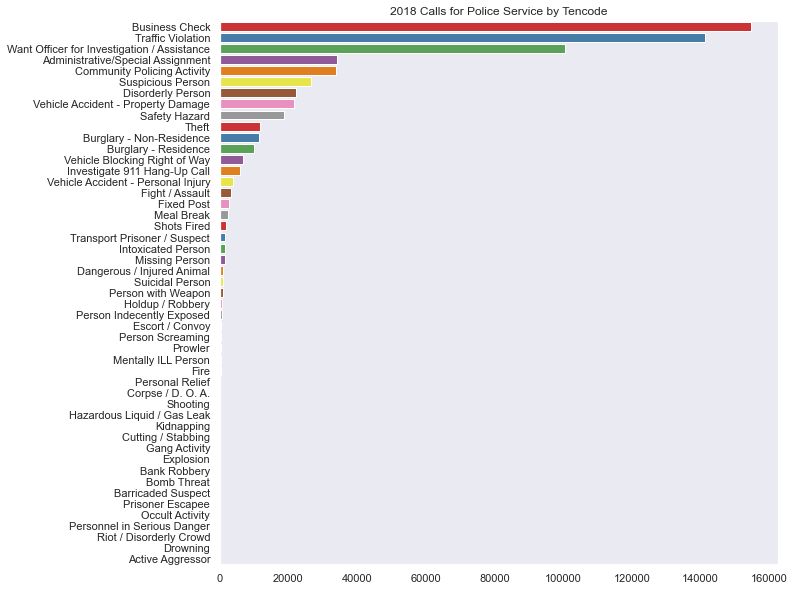

In [18]:
plt.figure(figsize = (10, 10))
sns.set(style = 'dark')
sns.barplot(x = 'tencode_counts', y = 'tencode', data = tencode_counts, palette = 'Set1')
plt.xlabel('')
plt.ylabel('')
plt.title('2018 Calls for Police Service by Tencode');

In [19]:
police_calls_2['zipcode'] = police_calls_2['zipcode'].astype(str)

In [20]:
zip_code_count = police_calls_2['zipcode'].value_counts()
zip_code_count = pd.DataFrame(data = zip_code_count)
zip_code_count = zip_code_count.reset_index()
zip_code_count.columns = ['zip_code', 'zip_code_count']
zip_code_count.head()

,zip_code,zip_code_count
0,37203,61962
1,37209,52248
2,37207,48750
3,37211,47528
4,37115,39879


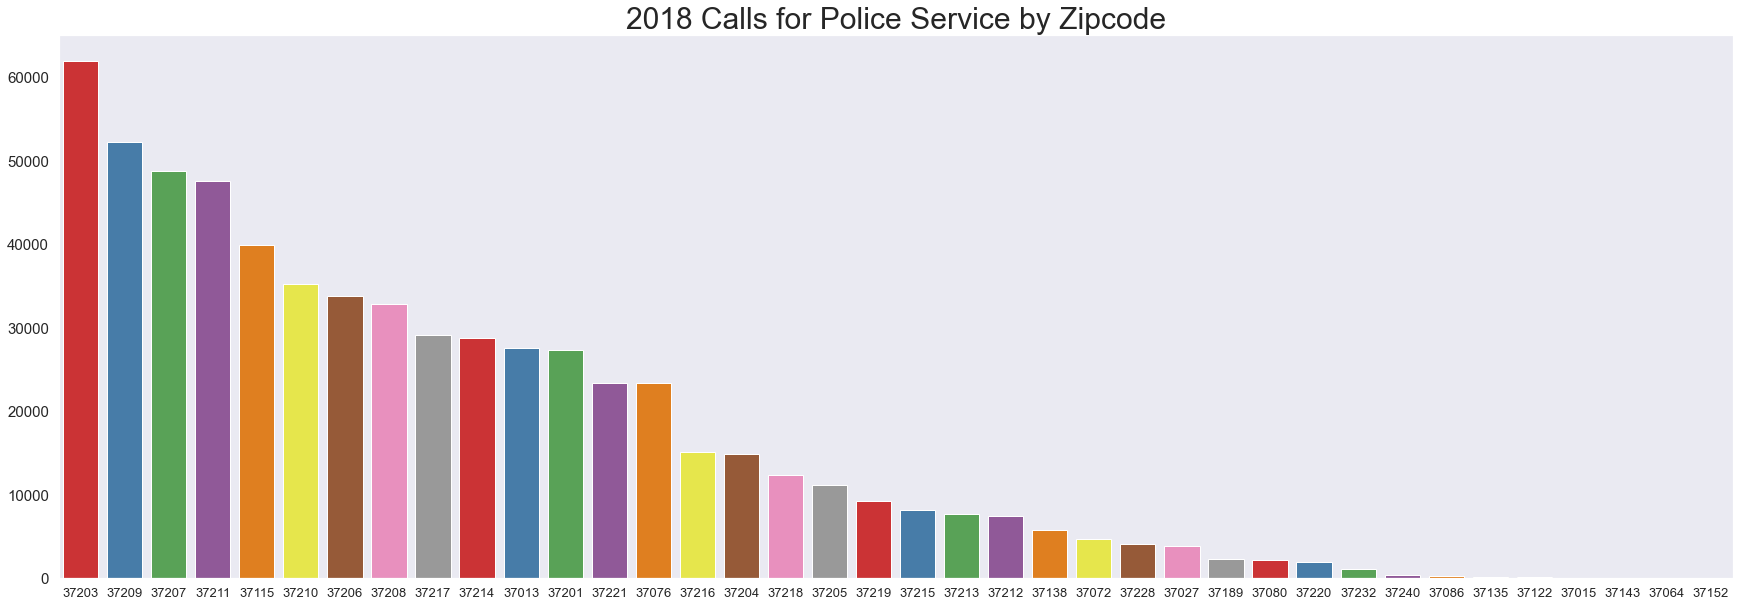

In [21]:
plt.figure(figsize = (30, 10))
sns.set(style = 'dark')
sns.barplot(x = 'zip_code', y = 'zip_code_count', data = zip_code_count, palette = 'Set1')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
plt.ylabel('')
plt.title('2018 Calls for Police Service by Zipcode', fontsize = 30);

In [22]:
police_calls_2['call_time'] = pd.to_datetime(police_calls_2['call_time'])
police_calls_2.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,2018-02-16 19:09:00,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,2018-02-16 20:02:00,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,2018-02-16 22:16:00,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,2018-02-16 17:58:00,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,2018-02-16 16:19:00,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


In [23]:
police_calls_2['call_month'] = police_calls_2['call_time'].dt.month
police_calls_2.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po,call_month
0,2018-02-16 19:09:00,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE,2
1,2018-02-16 20:02:00,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE,2
2,2018-02-16 22:16:00,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE,2
3,2018-02-16 17:58:00,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE,2
4,2018-02-16 16:19:00,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE,2


In [24]:
def fix_columns(column_list):
    new_lst = []
    for i in column_list:
        i = i.replace(' ', '_')
        i = i.lower()
        new_lst.append(i)
    return new_lst

In [25]:
month_count = police_calls_2['call_month'].value_counts()
month_counts = pd.DataFrame(data=month_count).reset_index()
month_counts.columns = ['month', 'month_count']
month_counts.sort_values('month')
month_counts.head(12)

,month,month_count
0,1,85094
1,3,79892
2,5,74718
3,8,73181
4,6,73098
5,2,72413
6,4,65953
7,7,57558
8,9,42934


In [26]:
police_calls_2.call_month.value_counts()

1    85094
3    79892
5    74718
8    73181
6    73098
2    72413
4    65953
7    57558
9    42934
Name: call_month, dtype: int64

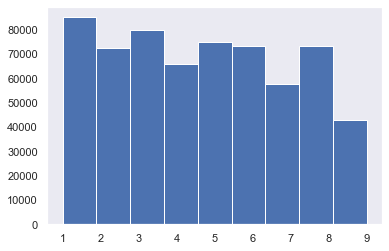

In [27]:
plt.hist(police_calls_2.call_month, bins = 9);

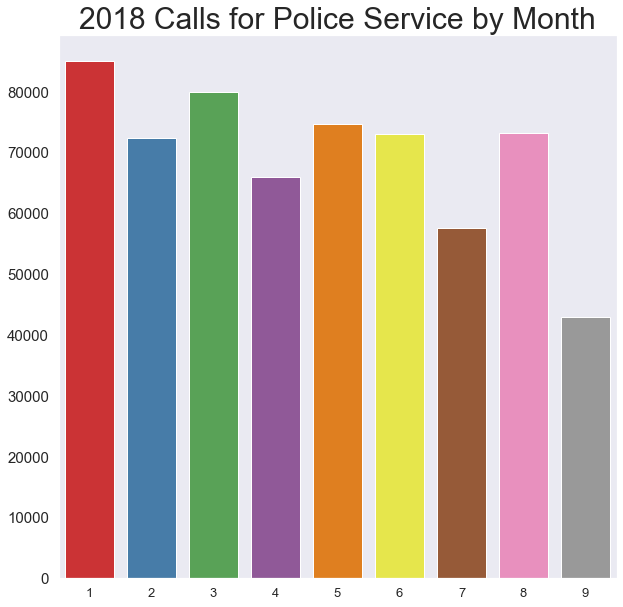

In [28]:
plt.figure(figsize = (10, 10))
sns.set(style = 'dark')
sns.barplot(x = 'month', y = 'month_count', data = month_counts, palette = 'Set1')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
plt.ylabel('')
plt.title('2018 Calls for Police Service by Month', fontsize = 30);

In [29]:
max(police_calls_2.call_time)

Timestamp('2018-09-21 03:13:24')

### Only the first 9 months have data associated with them. The most calls occur in the month of January and seem to drop throughout the year with spikes in March, May, and August. The lowest amount of calls, for the data provided, occur in September. 

# Week 2

In [30]:
hub = pd.read_csv('../data/hubNashville_2018.csv')
hub.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,Zipcode,Latitude,Longitude
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,02/07/2018 05:04:33 PM,Phone,37076.0,36.187902,-86.607286
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,02/27/2018 09:06:16 PM,hubNashville Community,37203.0,36.153761,-86.788745
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,02/08/2018 03:01:50 PM,Phone,37210.0,36.154836,-86.763345


In [31]:
hub.tail(3)

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,Zipcode,Latitude,Longitude
81163,114313,In Progress,"Streets, Roads & Sidewalks",Traffic Engineering,Request Markings,2018-11-05 13:02:37,NaN,Phone,37214.0,36.158931,-86.681223
81164,114808,Assigned,Property Violations,Junk and Debris,Junk and Debris,2018-11-06 18:51:18,NaN,hubNashville Community,37206.0,36.178080,-86.752980
81165,116264,In Progress,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2018-11-13 15:29:42,NaN,hubNashville Community,37211.0,36.036132,-86.724072


In [32]:
hub.shape

(81166, 11)

In [33]:
hub.columns = ['request_id', 'status', 'request_type', 'subrequest_type', 'add_subrequest_type', 'opened', 'closed', 'origin', 'zipcode', 'lat', 'lng']

In [34]:
hub.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,02/07/2018 05:04:33 PM,Phone,37076.0,36.187902,-86.607286
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,02/27/2018 09:06:16 PM,hubNashville Community,37203.0,36.153761,-86.788745
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,02/08/2018 03:01:50 PM,Phone,37210.0,36.154836,-86.763345


In [35]:
hub = hub[hub['closed'].notna()]

In [36]:
hub['closed'].isna().sum()

0

In [37]:
hub['opened'] = pd.to_datetime(hub['opened'])

In [38]:
hub['closed'] = pd.to_datetime(hub['closed'])

In [39]:
hub['resolution_time'] = (hub['closed'] - hub['opened'])

In [40]:
slow_data = hub[hub['resolution_time'] > '365 days']

In [41]:
slow_to_resolve = pd.DataFrame(data = slow_data)

In [42]:
slow_to_resolve.head()
slow_to_resolve.shape

(288, 12)

In [43]:
grouped_slow_requests = slow_to_resolve.groupby(['zipcode', 'request_type'])['request_id'].agg('count').reset_index()
grouped_slow_requests.head()

,zipcode,request_type,request_id
0,37013.0,Other,1
1,37013.0,Planning & Zoning,1
2,37013.0,Property Violations,3
3,37013.0,"Streets, Roads & Sidewalks",1
4,37015.0,Property Violations,2


### I see the slow requests grouped by zipcode first and then by request type second. 

In [44]:
conn = sql.connect('../data/metro_survey.db')
cur = conn.cursor()

In [45]:
cur.execute("SELECT name FROM sqlite_master WHERE type = 'table' ORDER BY name;")
available_tables = (cur.fetchall())

In [46]:
print(available_tables)

[('codes',), ('equality_and_access',), ('general_services',), ('info',), ('overall',), ('recreation',), ('safety',), ('transportation',)]


In [47]:
safety_df = pd.read_sql("SELECT * FROM safety;", conn)

In [48]:
safety_df.head()

,Id,Crime Prevention,Police - Overall,Fire and EMS - Overall,Police Visibility,Traffic Enforcement,Police Professionalism,Police Response Time,Fire Services,Fire Response Time,Emergency Medical Services (EMS),EMS Response Time,Fire Professionalism,EMS Professionalism,911 Services,Non-Emergency Number
0,1,Very Dissatisfied,Very Dissatisfied,Satisfied,Neutral,Neutral,Neutral,Dissatisfied,Neutral,Very Satisfied,Satisfied,Satisfied,Neutral,Neutral,Very Satisfied,Satisfied
1,2,Dissatisfied,Satisfied,Very Satisfied,Satisfied,Dissatisfied,Satisfied,Don't Know,Satisfied,Don't Know,Don't Know,Don't Know,Very Satisfied,Very Satisfied,Don't Know,Don't Know
2,3,Neutral,Neutral,Satisfied,Neutral,Satisfied,Neutral,Satisfied,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know
3,4,Satisfied,Very Satisfied,Don't Know,Satisfied,Satisfied,Very Satisfied,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know
4,5,Don't Know,Neutral,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Satisfied,Satisfied


In [49]:
respondent_info = pd.read_sql("SELECT * FROM info;", conn)

In [50]:
respondent_info.head()

,Id,Period,Date,ZIP Code,Quality of Life,Overall Feeling of Safety,Neighborhood Safety,Neighborhood Appearance,Nashville as Residence,Nashville as Place to Raise Children,Nashville as Workplace,Nashville as Retirement Place,Gender Identity
0,1,2018Q2,07/16/2018,37208,Neutral,Neutral,Neutral,Satisfied,Neutral,Good,Neutral,Neutral,Female
1,2,2018Q2,07/16/2018,37211,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,Good,Good,Female
2,3,2018Q2,07/16/2018,37208,Very Satisfied,Neutral,Satisfied,Satisfied,Excellent,Excellent,Excellent,Excellent,Male
3,4,2018Q2,07/16/2018,37203,Satisfied,Very Satisfied,Satisfied,Satisfied,Excellent,Don't Know,Excellent,Don't Know,Male
4,5,2018Q1,03/06/2018,37138,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,Good,Good,Female


In [51]:
query = '''
SELECT *
FROM safety
LEFT JOIN info 
USING (Id, Id);'''

In [52]:
safety_exp1 = safety_df.merge(respondent_info, how = 'left', on = 'Id')

In [ ]:
safety_exp1.head()
print(safety_exp1.columns)

In [54]:
safety_exp1.shape

(2171, 28)

In [75]:
safety_exp2 = pd.read_sql(query, conn)

In [77]:
safety_exp2.head()
print(safety_exp2.columns)

Index(['Id', 'Crime Prevention', 'Police - Overall', 'Fire and EMS - Overall',
       'Police Visibility', 'Traffic Enforcement', 'Police Professionalism',
       'Police Response Time', 'Fire Services', 'Fire Response Time',
       'Emergency Medical Services (EMS)', 'EMS Response Time',
       'Fire Professionalism', 'EMS Professionalism', '911 Services',
       'Non-Emergency Number', 'Period', 'Date', 'ZIP Code', 'Quality of Life',
       'Overall Feeling of Safety', 'Neighborhood Safety',
       'Neighborhood Appearance', 'Nashville as Residence',
       'Nashville as Place to Raise Children', 'Nashville as Workplace',
       'Nashville as Retirement Place', 'Gender Identity'],
      dtype='object')


In [57]:
safety_exp2.shape

(2171, 28)

### They are the same sizes. 

In [58]:
safety_exp1 = safety_exp1[['Id', 'Crime Prevention', 'Police - Overall', 'Police Visibility', 'Police Professionalism', 'Police Response Time', 'ZIP Code']]

In [59]:
safety_grouped = pd.DataFrame(safety_exp1.groupby(['ZIP Code', 'Police - Overall'])['Id'].agg('count').reset_index())

In [60]:
safety_grouped.columns = ['zip', 'overall_satisfaction', 'count']
safety_grouped.head()

,zip,overall_satisfaction,count
0,37013,Dissatisfied,28
1,37013,Don't Know,8
2,37013,Neutral,36
3,37013,Satisfied,79
4,37013,Very Dissatisfied,8


In [61]:
safety_grouped['zip'] = safety_grouped['zip'].astype(str)

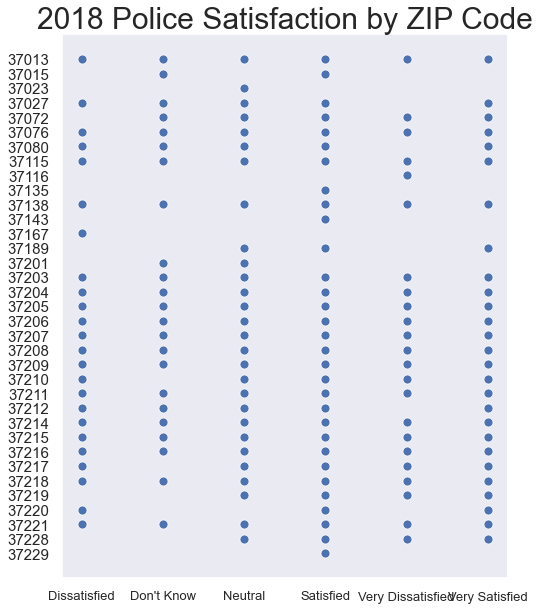

In [62]:
#plt.figure(figsize = (100, 100))

sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(8,10))
sns.scatterplot(x="overall_satisfaction", 
                y="zip", 
                data=safety_grouped)
#sns.relplot(x = 'Police - Overall', y = 'ZIP Code', data = safety_grouped, palette = 'Set1')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
plt.ylabel('')
plt.title('2018 Police Satisfaction by ZIP Code', fontsize = 30);

In [63]:
safety_top_five = safety_grouped.loc[safety_grouped.zip.isin(['37203', '37209', '37207', '37211', '37115'])]

In [64]:
safety_top_five.head()

,zip,overall_satisfaction,count
30,37115,Dissatisfied,13
31,37115,Don't Know,2
32,37115,Neutral,20
33,37115,Satisfied,37
34,37115,Very Dissatisfied,5


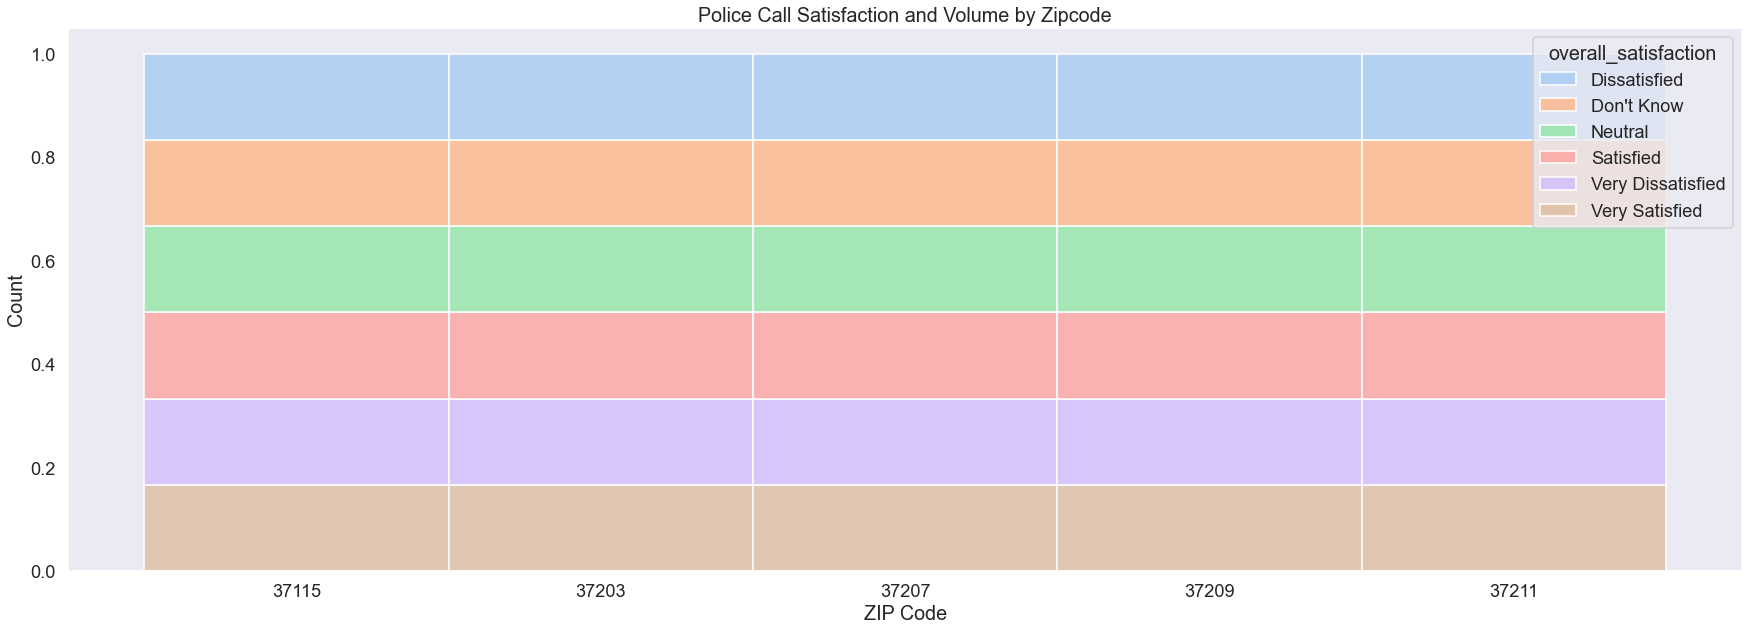

In [69]:
f = plt.figure(figsize=(30,10))
ax = f.add_subplot(1,1,1)

sns.histplot(data=safety_top_five, ax=ax, stat="frequency", multiple="stack",
             x="zip", kde=False,
             palette="pastel", hue="overall_satisfaction",
             element="bars", legend=True)
ax.set_title("Police Call Satisfaction and Volume by Zipcode")
ax.set_xlabel("ZIP Code")
ax.set_ylabel("Count");

In [73]:
nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 12)

for ind, row in slow_to_resolve.iterrows():
    point = [row['lat'], row['lng']]
    popup = row['request_type'] + ": " + str(row['resolution_time'])
    folium.Marker(point, popup = popup).add_to(nash_map)

nash_map